In [10]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/Users/sandeep/ensemble_techniques/data/jambore_education.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.shape

(500, 9)

Now, let us drop the irrelevant column and check if there are any null values in the dataset

In [12]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Lets see the distribution of the variables of graduate applicants.

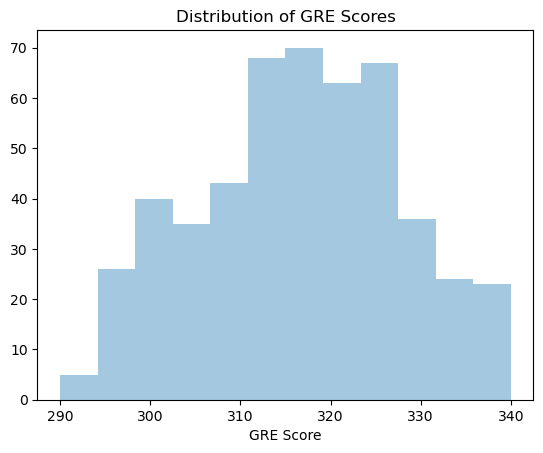

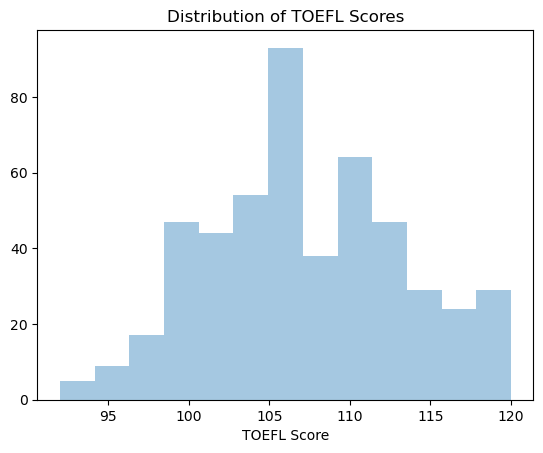

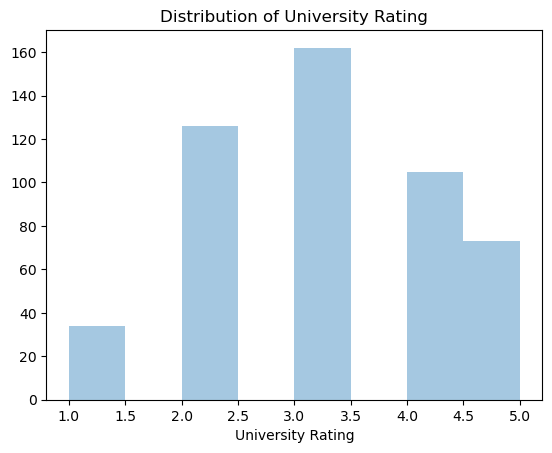

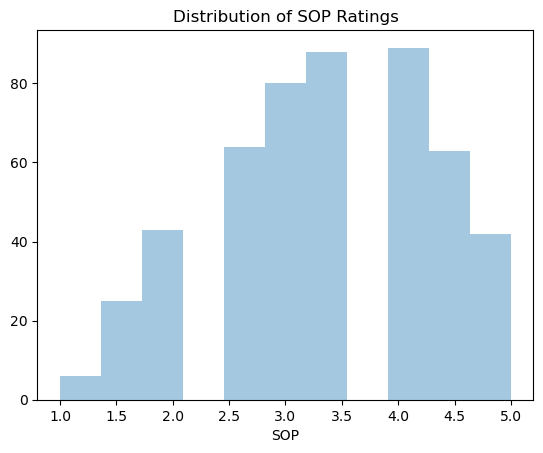

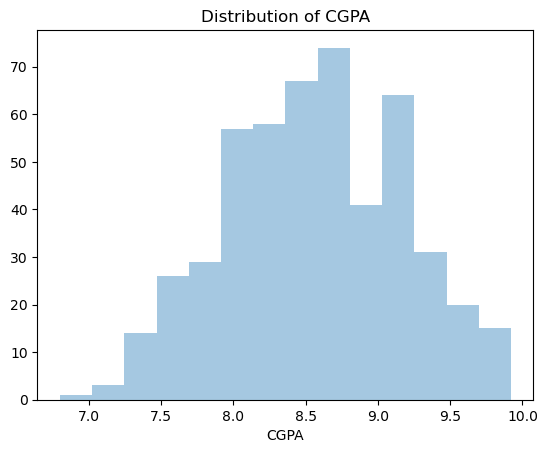

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

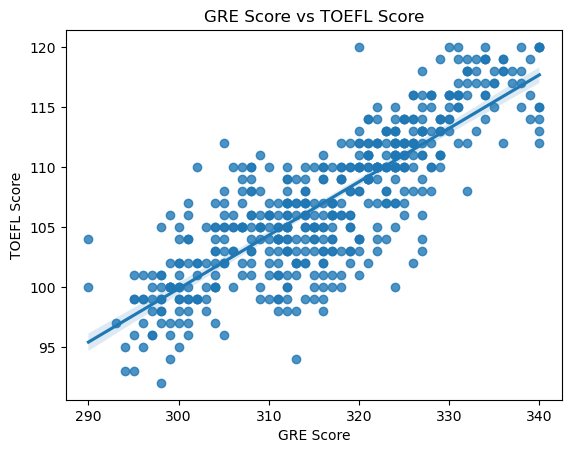

In [14]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

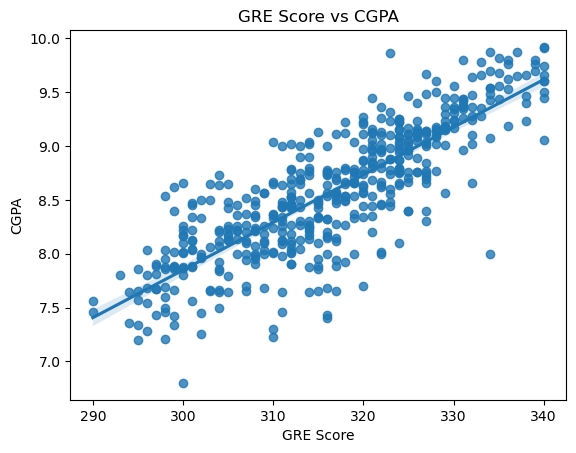

In [15]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

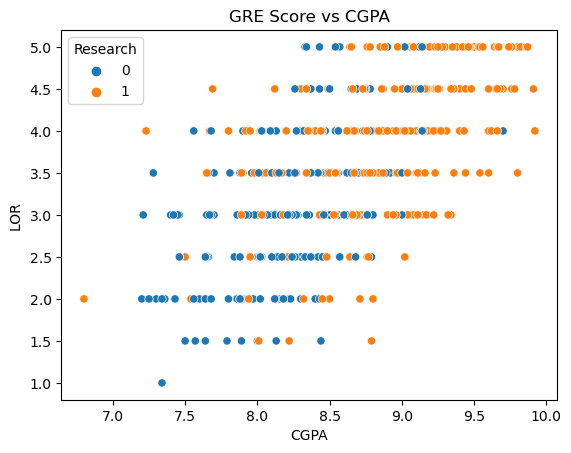

In [16]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

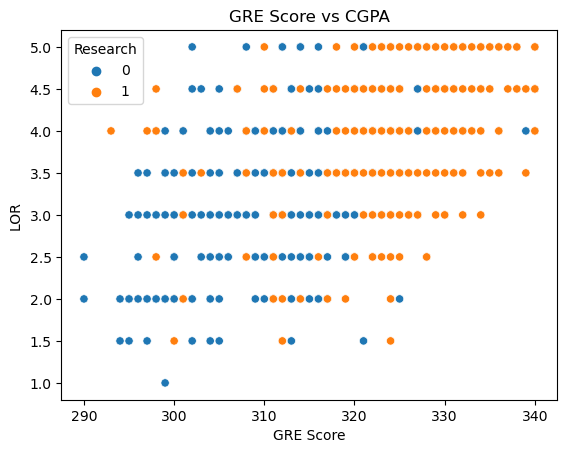

In [17]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

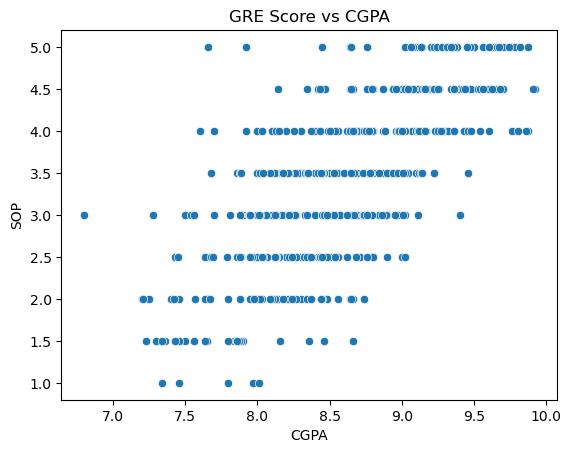

In [18]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

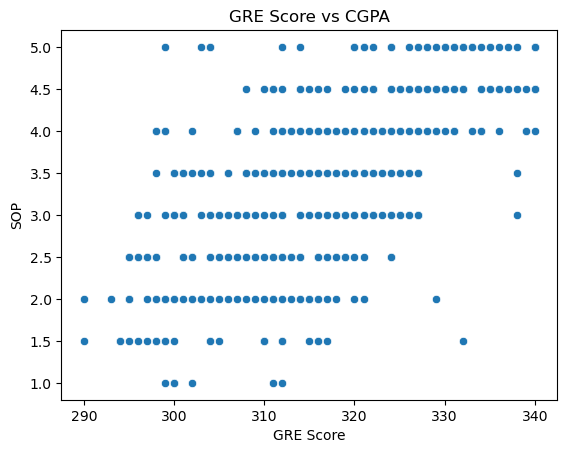

In [19]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related

> Indented block

> Indented block





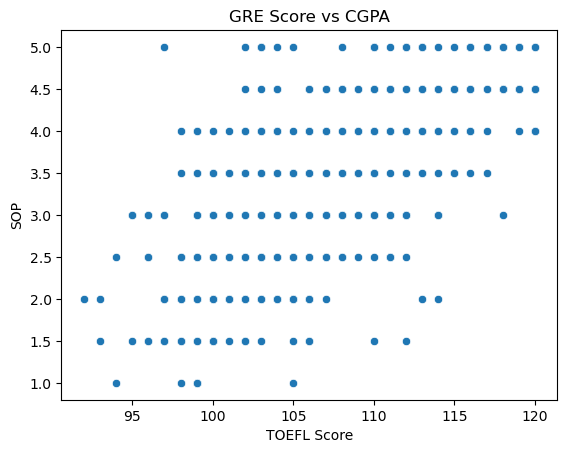

In [20]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

**Correlation among variables**

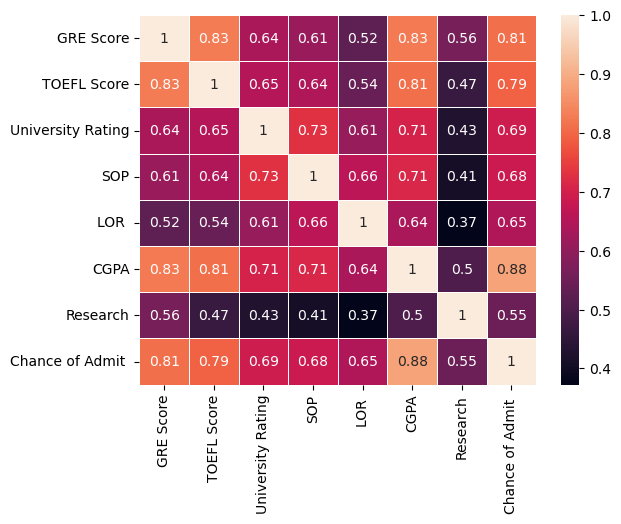

In [21]:
import numpy as np
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)


In [24]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
475,300,101,3,3.5,2.5,7.88,0
232,312,107,2,2.5,3.5,8.27,0
187,335,118,5,4.5,3.5,9.44,1
86,315,106,3,4.5,3.5,8.42,0
74,314,106,3,3.0,5.0,8.90,0
...,...,...,...,...,...,...,...
299,305,112,3,3.0,3.5,8.65,0
282,312,106,3,4.0,3.5,8.79,1
281,317,110,3,4.0,4.5,9.11,1
240,296,101,1,2.5,3.0,7.68,0


In [25]:
y_train

475    0.59
232    0.69
187    0.93
86     0.72
74     0.74
       ... 
299    0.71
282    0.81
281    0.80
240    0.60
293    0.64
Name: Chance of Admit , Length: 400, dtype: float64

In [26]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)




In [27]:
X_train_std

array([[-1.4592062 , -1.04668635, -0.14063251, ..., -1.06414726,
        -1.18110138, -1.15723001],
       [-0.40419946, -0.06618391, -1.0195857 , ..., -0.00265373,
        -0.53616521, -1.15723001],
       [ 1.6178968 ,  1.73140389,  1.61727387, ..., -0.00265373,
         1.39864331,  0.86413245],
       ...,
       [ 0.03538668,  0.42406731, -0.14063251, ...,  1.05883979,
         0.85292809,  0.86413245],
       [-1.81087512, -1.04668635, -1.8985389 , ..., -0.5334005 ,
        -1.51183787, -1.15723001],
       [-0.40419946, -1.53693758, -1.8985389 , ..., -0.5334005 ,
        -0.68499663,  0.86413245]])

In [28]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)


In [29]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.459206,-1.046686,-0.140633,0.084948,-1.064147,-1.181101,-1.157230
1,-0.404199,-0.066184,-1.019586,-0.944725,-0.002654,-0.536165,-1.157230
2,1.617897,1.731404,1.617274,1.114622,-0.002654,1.398643,0.864132
3,-0.140448,-0.229601,-0.140633,1.114622,-0.002654,-0.288113,-1.157230
4,-0.228365,-0.229601,-0.140633,-0.429889,1.589587,0.505655,-1.157230
...,...,...,...,...,...,...,...
395,-1.019620,0.750901,-0.140633,-0.429889,-0.002654,0.092234,-1.157230
396,-0.404199,-0.229601,-0.140633,0.599785,-0.002654,0.323750,0.864132
397,0.035387,0.424067,-0.140633,0.599785,1.058840,0.852928,0.864132
398,-1.810875,-1.046686,-1.898539,-0.944725,-0.533400,-1.511838,-1.157230


Lets use a bunch of different algorithms to see which model performs better

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], 
          ['Ridge Regression :', Ridge(alpha=1.0)] 
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

    #ADD MAPE

Results without removing features with multicollinearity ...
Linear Regression : 0.05796959869352113
Lasso Regression : 0.113044018906505
Ridge Regression : 0.057980146270179264


## Linear Regression using Statsmodel library


- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.


In [31]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     260.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.32e-143
Time:                        22:08:29   Log-Likelihood:                 558.11
No. Observations:                 400   AIC:                            -1100.
Df Residuals:                     392   BIC:                            -1068.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7246      0.00

In [32]:
X_train_new=X_train.drop(columns='SOP')

In [33]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     303.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.60e-144
Time:                        22:08:29   Log-Likelihood:                 557.69
No. Observations:                 400   AIC:                            -1101.
Df Residuals:                     393   BIC:                            -1073.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7246      0.00

## VIF(Variance Inflation Factor)

- “ VIF score of an independent variable represents how well the variable is explained by other independent variables.

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif


In [35]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.628545
2,TOEFL Score,4.156393
3,University Rating,2.357786
4,LOR,1.958783
5,CGPA,4.900721
6,Research,1.509934


### VIF looks fine and hence, we can go ahead with the predictions

In [36]:
X_test_std= std.transform(X_test)

In [37]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) # col name same as train datasets


In [38]:
X_test = sm.add_constant(X_test)

In [39]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [40]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [41]:
X_test_new=X_test.drop(columns=X_test_del)

In [42]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.04051581866553151
Root Mean Square Error  0.05757600840058522


## Mean of Residuals

In [43]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.004961725552463039


## Test for Homoscedasticity

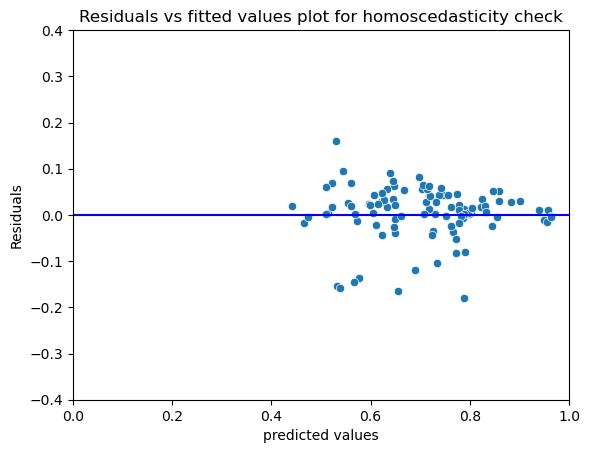

In [44]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [45]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.2481650071992583), ('p-value', 0.23782379723877475)]

#### Here `null hypothesis` is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

## Normality of residuals

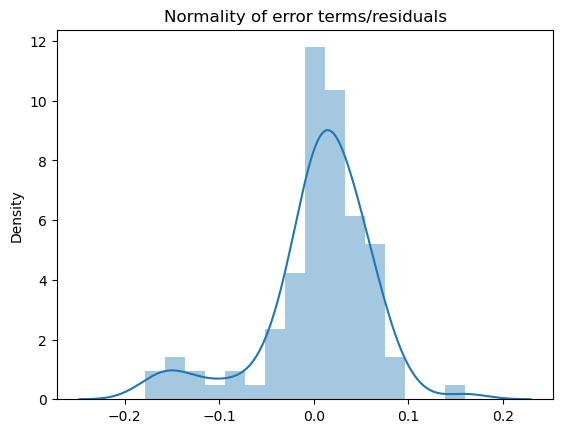

In [46]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

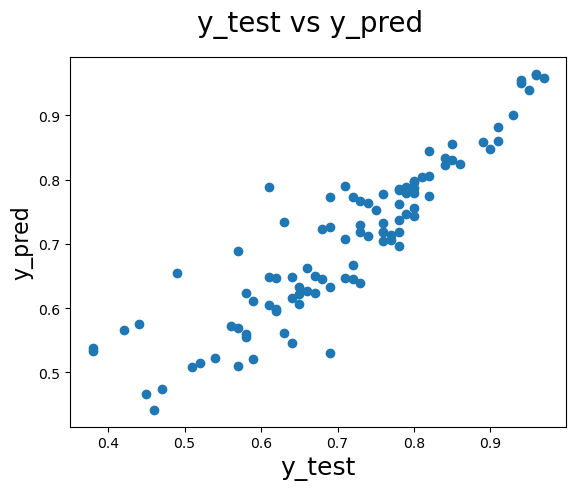

In [47]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [48]:
#INSIGHTS AND RECOMMENDATIONS